In [30]:
# Importar librerías
import nltk
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

In [31]:
# Descargar el corpus de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/lenis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
data = pd.read_excel('data.xlsx')

In [33]:
# Visualización de los datos de entrada
data

,textos,ODS
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,No dejar clara la naturaleza de estos riesgos ...,6
2,"Como resultado, un mayor y mejorado acceso al ...",13
3,Con el Congreso firmemente en control de la ju...,16
4,"Luego, dos secciones finales analizan las impl...",5
...,...,...
9651,Esto implica que el tiempo de las mujeres en e...,5
9652,"Sin embargo, estas fallas del mercado implican...",3
9653,El hecho de hacerlo y cómo hacerlo dependerá e...,9
9654,"Esto se destacó en el primer estudio de caso, ...",6


In [34]:
# Conteo de cada categoria
data['ODS'].value_counts()

ODS
16    1080
5     1070
4     1025
3      894
7      787
6      695
11     607
1      505
13     464
8      446
14     377
2      369
10     352
9      343
15     330
12     312
Name: count, dtype: int64

In [35]:
# Conteo de datos duplicados y nulos
print(f'Duplicados: {data.duplicated().sum()}')
print(f'Nulos:\n{data.isna().sum()}')

Duplicados: 0
Nulos:
textos    0
ODS       0
dtype: int64


In [36]:
# Preprocesamiento de texto
def preprocess_text(text):
    # Crear el objeto stemmer asignandole el idioma español
    stemmer = SnowballStemmer("spanish")
    # Obtener las palabras vacías en español
    stop_words = set(stopwords.words('spanish'))
    # Conveierte el texto a minúsculas
    text = text.lower()
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Se aplica el stemmer solo a las palabras de interes 
    clean_tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    # Se recontruye la cadena de texto
    clean_text = " ".join(clean_tokens)
    return clean_text



In [37]:
# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data['textos'], data['ODS'], test_size=0.2, random_state=42)

# Se crea el vector TF-IDF y se pasa la función de preprocesamiento
vectorizer = TfidfVectorizer(preprocessor=preprocess_text)

([<matplotlib.patches.Wedge at 0x7f0634fb9ed0>,
 [Text(1.031381910450487, 0.38242823483041055, '16'),
  Text(0.5463797257485348, 0.9547089584218618, '5'),
  Text(-0.17154760691510257, 1.086541033998119, '4'),
  Text(-0.7762340304111729, 0.7793976713024146, '3'),
  Text(-1.0677305397426755, 0.26448344844397204, '7'),
  Text(-1.0689031671531202, -0.25970371435547257, '6'),
  Text(-0.8724616673148422, -0.6699333094168447, '11'),
  Text(-0.5828521930242503, -0.9328897689903252, '1'),
  Text(-0.2640491649466214, -1.0678380207180262, '13'),
  Text(0.056348253956361755, -1.0985558129999902, '8'),
  Text(0.3512170299136618, -1.0424234254364328, '14'),
  Text(0.5968247254621197, -0.9240131206195428, '2'),
  Text(0.7993373108264613, -0.7556850293083232, '10'),
  Text(0.9538187615960241, -0.5479322677370142, '9'),
  Text(1.0498853146052745, -0.32823897723485596, '15'),
  Text(1.094408692707599, -0.11076828664398439, '12')],
 [Text(0.5625719511548111, 0.20859721899840572, '11.3%'),
  Text(0.298025

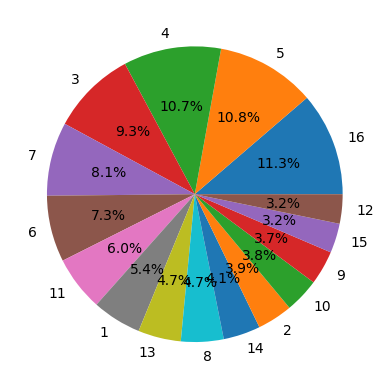

In [38]:
# Contar y normalizar
dfsizes = y_train.value_counts()/y_train.shape[0]
# Crear figura
fig, ax = plt.subplots()
# Graficar balance de clases
ax.pie(list(dfsizes),labels=list(dfsizes.index) ,autopct='%1.1f%%')

In [39]:
# Construir el pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer), # Vectorizador TF-IDF
    ('svd', TruncatedSVD(n_components=100)), # Reducción de dimensionalidad
    ('clf', SVC(kernel='linear')), # Clasificador SVM
])

In [40]:
# Entrenar el modelo
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x7f061342c5e0>)),
                ('svd', TruncatedSVD(n_components=100)),
                ('clf', SVC(kernel='linear'))])

In [41]:
# Evaluar el modelo
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        90
           2       0.76      0.83      0.79        71
           3       0.84      0.90      0.87       178
           4       0.93      0.97      0.95       200
           5       0.94      0.91      0.93       232
           6       0.92      0.89      0.91       135
           7       0.92      0.89      0.91       164
           8       0.60      0.71      0.65        86
           9       0.63      0.84      0.72        55
          10       0.67      0.48      0.56        60
          11       0.85      0.78      0.81       143
          12       0.93      0.80      0.86        64
          13       0.85      0.81      0.83       102
          14       0.95      0.88      0.91        64
          15       0.99      0.89      0.94        81
          16       0.92      0.99      0.95       207

    accuracy                           0.87      1932
   macro avg       0.85   

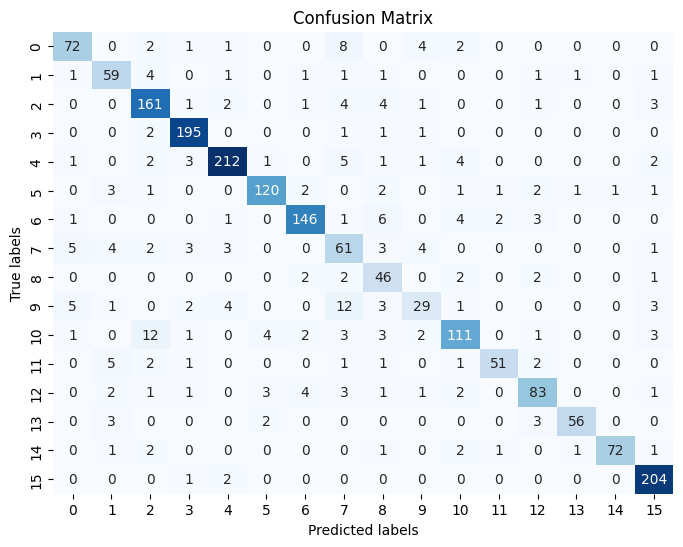

In [42]:
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Word2Vec

In [ ]:
nltk_stopwords = stopwords.words("spanish")


In [43]:
x_train_tokenized = x_train.apply(lambda x: word_tokenize(x,'spanish'))
x_train_tokenized

9620    [Esto, puede, lograrse, a, través, de, una, se...
4929    [Los, factores, sociales, y, culturales, son, ...
2302    [Los, centros, de, AEPI, de, calidad, responde...
8184    [Por, ejemplo, ,, en, Australia, ,, se, dispus...
5748    [Es, importante, destacar, que, el, uso, compa...
                              ...                        
5734    [No, más, del, 40, %, de, los, fondos, de, SP,...
5191    [Por, ejemplo, ,, con, el, umbral, de, pobreza...
5390    [Esto, convierte, al, turismo, en, una, indust...
860     [A, través, de, este, proceso, ,, se, crearon,...
7270    [Además, ,, la, red, de, distribución, no, se,...
Name: textos, Length: 7724, dtype: object

In [44]:
model = Word2Vec(x_train_tokenized, vector_size=2000, window=80, min_count=40, workers=4)

In [45]:
def word_averaging(model, words):
    mean = []
    for word in words:
        if word in model.wv.index_to_key:
            mean.append(model.wv[word])
    if not mean:
        return np.zeros(model.vector_size)
    return np.mean(mean, axis=0)

def word_vectorizer(X):
    return np.array([word_averaging(model, words) for words in X])


In [46]:
x_train_word_2_vector = word_vectorizer(x_train_tokenized)

In [47]:
x_train_word_2_vector.shape

(7724, 2000)

In [48]:
svm_classifier = SVC(kernel='linear')

In [49]:
svm_classifier.fit(x_train_word_2_vector, y_train)

SVC(kernel='linear')

In [52]:
x_test_tokenized = x_test.apply(lambda x: word_tokenize(x,'spanish'))
x_test_word_2_vector = word_vectorizer(x_test_tokenized)

In [53]:
y_pred = svm_classifier.predict(x_test_word_2_vector)

In [54]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.81      0.78        90
           2       0.45      0.46      0.46        71
           3       0.75      0.84      0.79       178
           4       0.93      0.94      0.94       200
           5       0.92      0.88      0.90       232
           6       0.81      0.84      0.82       135
           7       0.77      0.82      0.79       164
           8       0.57      0.48      0.52        86
           9       0.38      0.42      0.40        55
          10       0.59      0.55      0.57        60
          11       0.58      0.53      0.55       143
          12       0.60      0.48      0.53        64
          13       0.71      0.69      0.70       102
          14       0.38      0.50      0.43        64
          15       0.57      0.31      0.40        81
          16       0.89      0.97      0.93       207

    accuracy                           0.74      1932
   macro avg       0.67   

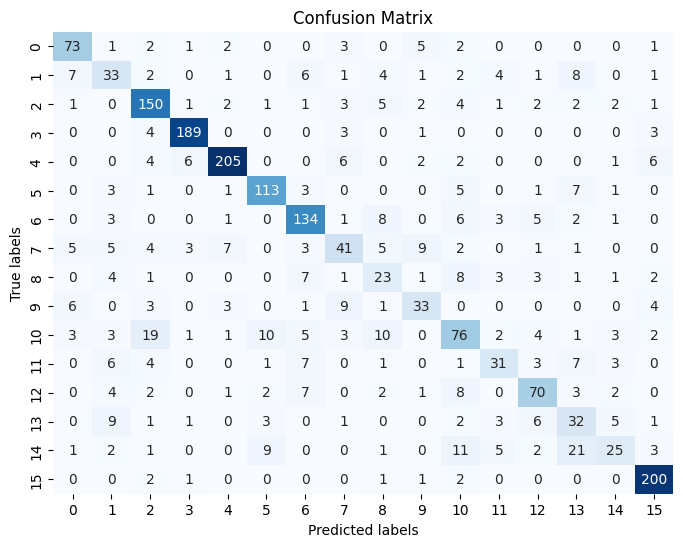

In [55]:
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define el objeto KFold para dividir los datos en k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define los parámetros que deseas probar
parameters = {
    'clf__C': [0.1, 1, 10, 100, 1000],  # Parámetro de regularización C
    'clf__kernel': ['linear', 'rbf', 'poly']  # Tipo de kernel
}

# Crea el objeto GridSearchCV con KFold como estrategia de validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=kf, verbose=1)

# Realiza la búsqueda de hiperparámetros
print(type(x_train))
grid_search.fit(x_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))


<class 'sklearn.pipeline.Pipeline'>
<class 'dict'>
<class 'pandas.core.series.Series'>
Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

In [ ]:
logreg = LogisticRegression(max_iter=500)
vectorizer = CountVectorizer(preprocessor=preprocess_text)
pipeline = Pipeline([
    ('tfidf', vectorizer), # Vectorizador TF-IDF
    ('svd', TruncatedSVD(n_components=100)), # Reducción de dimensionalidad
    ('clf', logreg), # Clasificador SVM
])

In [ ]:
# Entrenar el modelo
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 CountVectorizer(preprocessor=<function preprocess_text at 0x7f81e5339a80>)),
                ('svd', TruncatedSVD(n_components=100)),
                ('clf', LogisticRegression(max_iter=500))])

In [ ]:
# Evaluar el modelo
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.77      0.78        90
           2       0.64      0.76      0.69        71
           3       0.85      0.83      0.84       178
           4       0.90      0.94      0.92       200
           5       0.90      0.86      0.88       232
           6       0.89      0.85      0.87       135
           7       0.88      0.82      0.85       164
           8       0.51      0.53      0.52        86
           9       0.52      0.64      0.57        55
          10       0.44      0.47      0.46        60
          11       0.76      0.66      0.70       143
          12       0.67      0.75      0.71        64
          13       0.81      0.78      0.80       102
          14       0.75      0.72      0.74        64
          15       0.87      0.85      0.86        81
          16       0.93      0.99      0.96       207

    accuracy                           0.81      1932
   macro avg       0.76   

# Conlusiones
- Se realizó la reducción de dimensionalidad con svd puesto que es un método para realizar la reducción de dimensionalidad para matrices dispersas que es más eficiente que aplicar PCA.
  
- También se realizó la aproximación de reducción de dimensionalidad con Word2Vec, este método puede manejar la semántica de las palabras, pero al realizar la clasificación con SVM tuvo menor rendimiento a la reducción con truncate SVD, casi de 10% menor.
  
- Se compararon los modelos de regresión logística y SVM, para elegir el que mejor exactitud arroje con los datos, se relizan pruebas con vectorizadores diferentes y el SVM arroja mejores resultados para los datos, quedando con un 0.87 de exactitud. SVM es una técnica clásica pero para este caso de uso fue efectivo combinandolo con vectorizadores como TF-IDF, adicional a esto maximiza la distancia entre el hiperplano de separación de los puntos más cercanos a esta.